In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

data_dir = "../data"
bootstrap_dir = "../bootstraps"
fig_dir = "../figures"

In [4]:
from rescreener import Rescreener

rescreen_6weeks = Rescreener(
    os.path.join(data_dir, "6weeks_all.tsv"),
    reference_libraries=["aav1", "aav2", "aav3", "aav4"],
    prefix=os.path.join(bootstrap_dir, "all"),
    overwrite=True,
    use_product=True,
    min_base_mean=100,
)

rescreen_camkii = Rescreener(
    os.path.join(data_dir, "exp137_camkii.tsv"),
    reference_libraries=["aav1", "aav2"],
    prefix=os.path.join(bootstrap_dir, "camkii"),
    overwrite=True,
    use_product=True,
    min_base_mean=100,
)

rescreen_gaba = Rescreener(
    os.path.join(data_dir, "exp137_gaba.tsv"),
    reference_libraries=["aav1", "aav2"],
    exclude_samples=["22", "27", "28", "29", "30", "31", "33", "34"],
    prefix=os.path.join(bootstrap_dir, "gaba"),
    overwrite=True,
    use_product=True,
    min_base_mean=100,
)

rescreen_m3 = Rescreener(
    os.path.join(data_dir, "lc9k_m3_hsyn.tsv"),
    reference_libraries=["aav3", "aav4"],
    prefix=os.path.join(bootstrap_dir, "m3"),
    overwrite=True,
    use_product=True,
    min_base_mean=100,
)

rescreens = [
    rescreen_6weeks,
    rescreen_camkii,
    rescreen_gaba,
    rescreen_m3,
]

for r in rescreens:
    r.run_original()
    r.run_bootstraps()

Starting crispr_screen...
Done.


Running bootstraps: 100%|██████████| 950/950 [00:55<00:00, 17.18it/s]


Starting crispr_screen...
Done.


Running bootstraps: 100%|██████████| 550/550 [00:27<00:00, 19.91it/s]


Starting crispr_screen...
Done.


Running bootstraps: 100%|██████████| 500/500 [00:28<00:00, 17.72it/s]


Starting crispr_screen...
Done.


Running bootstraps: 100%|██████████| 900/900 [01:09<00:00, 12.91it/s]


In [5]:
from rescreener import BootstrapAnalysis

sample_names = ["all", "camkii", "gaba", "m3"]

fdr = 0.05
bsa_list = [
    BootstrapAnalysis(os.path.join(bootstrap_dir, name), fdr=fdr)
    for name in sample_names
]

Loading hits from subsets: 100%|██████████| 950/950 [00:08<00:00, 109.90it/s]


Measuring set overlaps...
Measuring hit recovery...
Measuring subset recovery...
Analysis loaded.


Loading hits from subsets: 100%|██████████| 550/550 [00:04<00:00, 126.06it/s]


Measuring set overlaps...
Measuring hit recovery...
Measuring subset recovery...
Analysis loaded.


Loading hits from subsets: 100%|██████████| 500/500 [00:03<00:00, 129.25it/s]


Measuring set overlaps...
Measuring hit recovery...
Measuring subset recovery...
Analysis loaded.


Loading hits from subsets: 100%|██████████| 900/900 [00:07<00:00, 127.10it/s]


Measuring set overlaps...
Measuring hit recovery...
Measuring subset recovery...
Analysis loaded.


In [6]:
# export tables
export_dir = "../tables"
for bsa, name in zip(bsa_list, sample_names):
    for table_name in ["overlaps", "recovery", "subset_recovery"]:
        bsa.export_table(
            table_name, os.path.join(export_dir, f"{name}_{table_name}.tsv")
        )

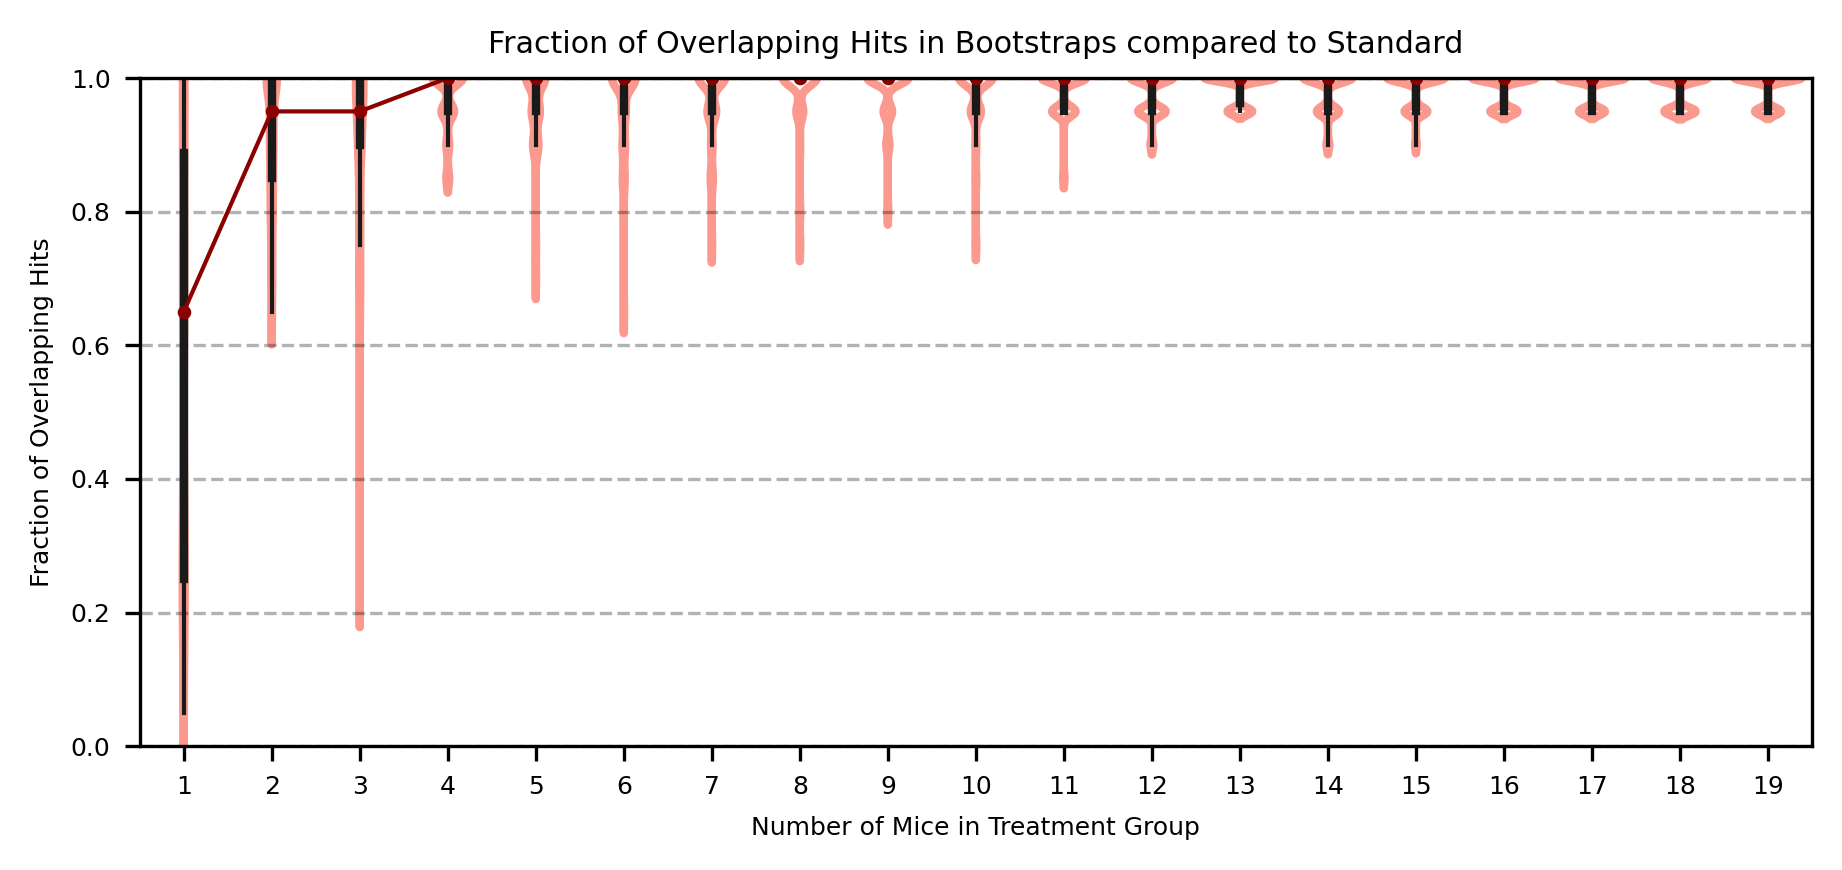

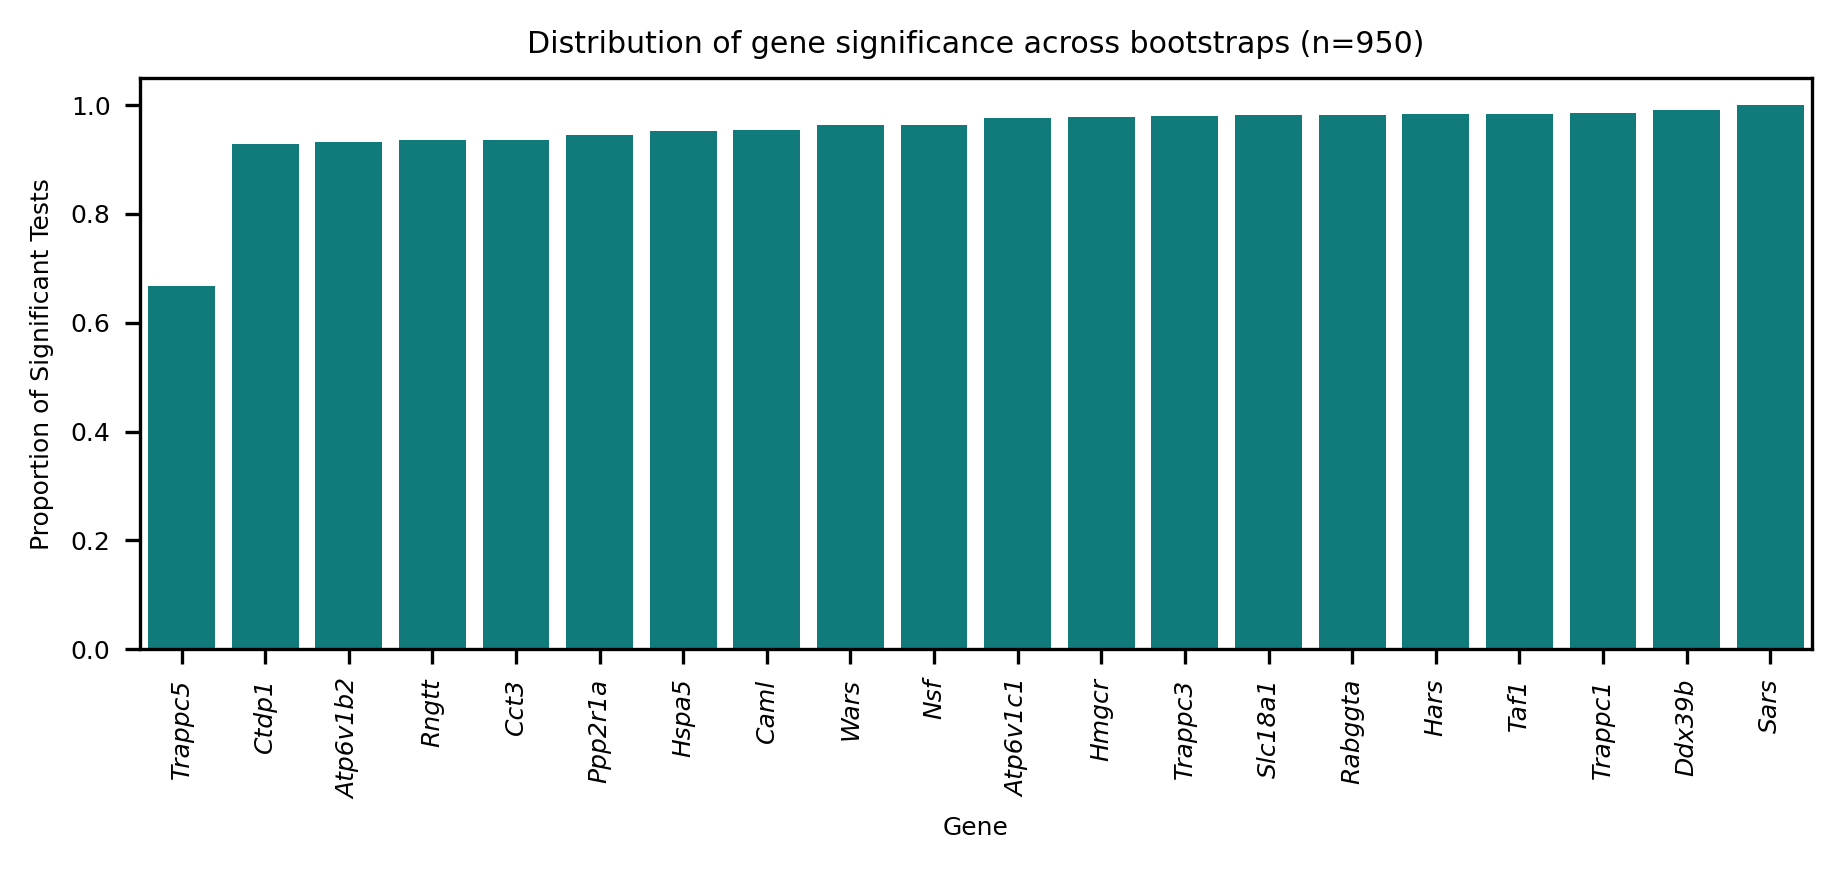

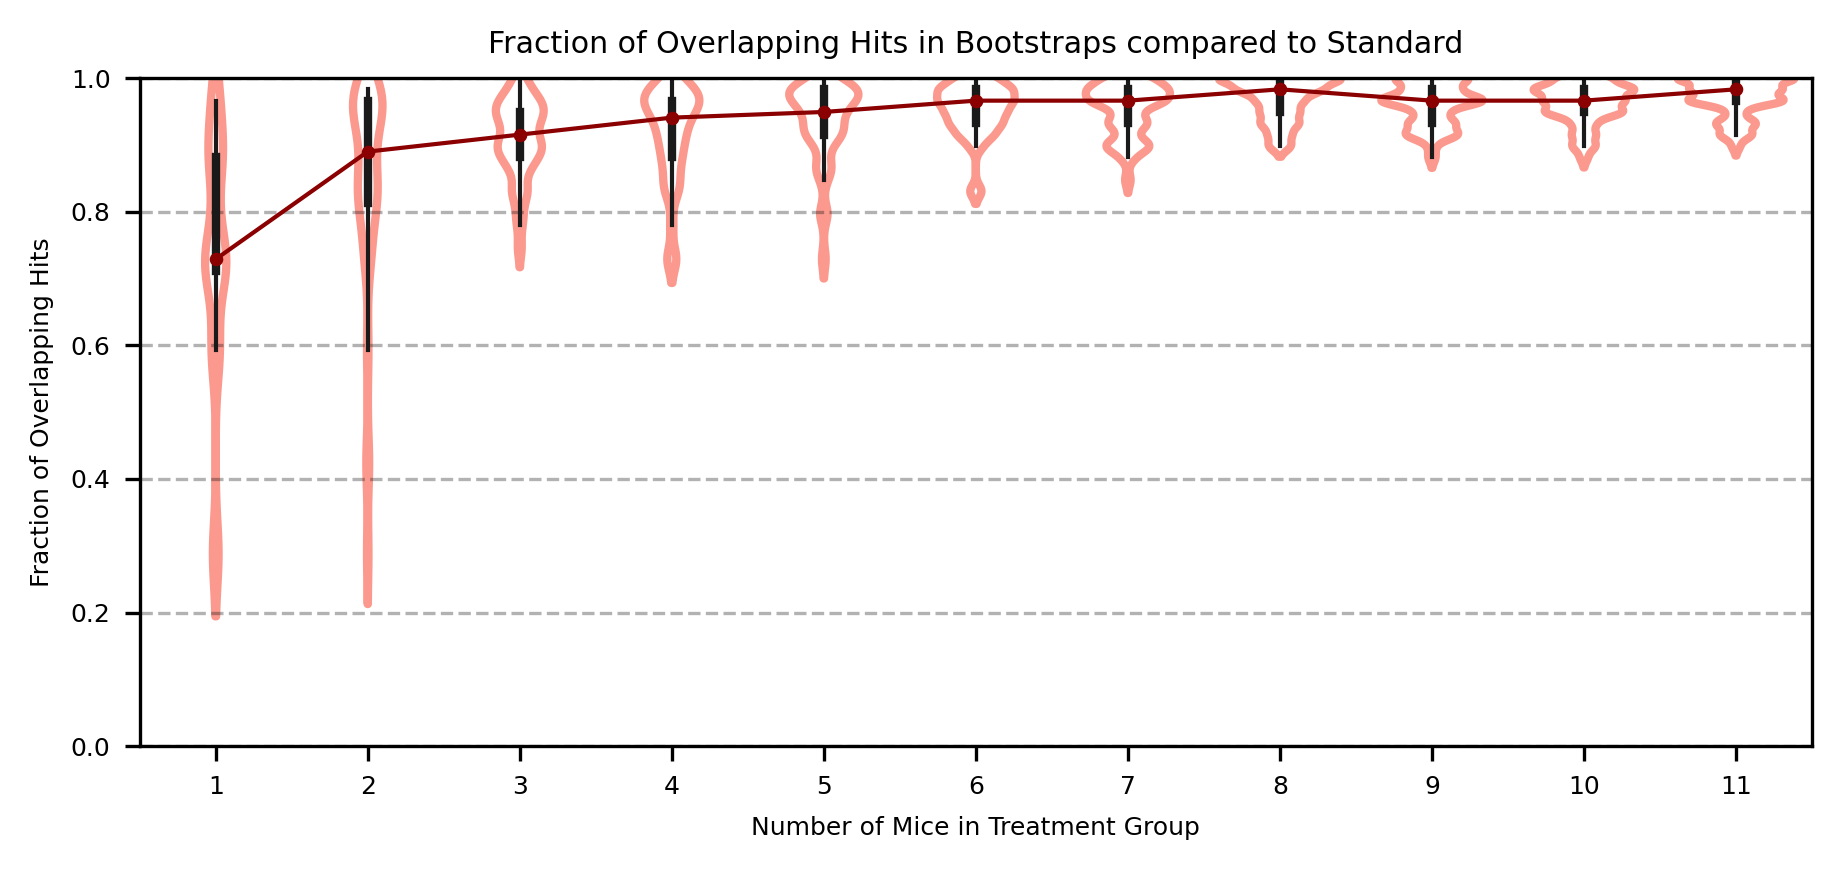

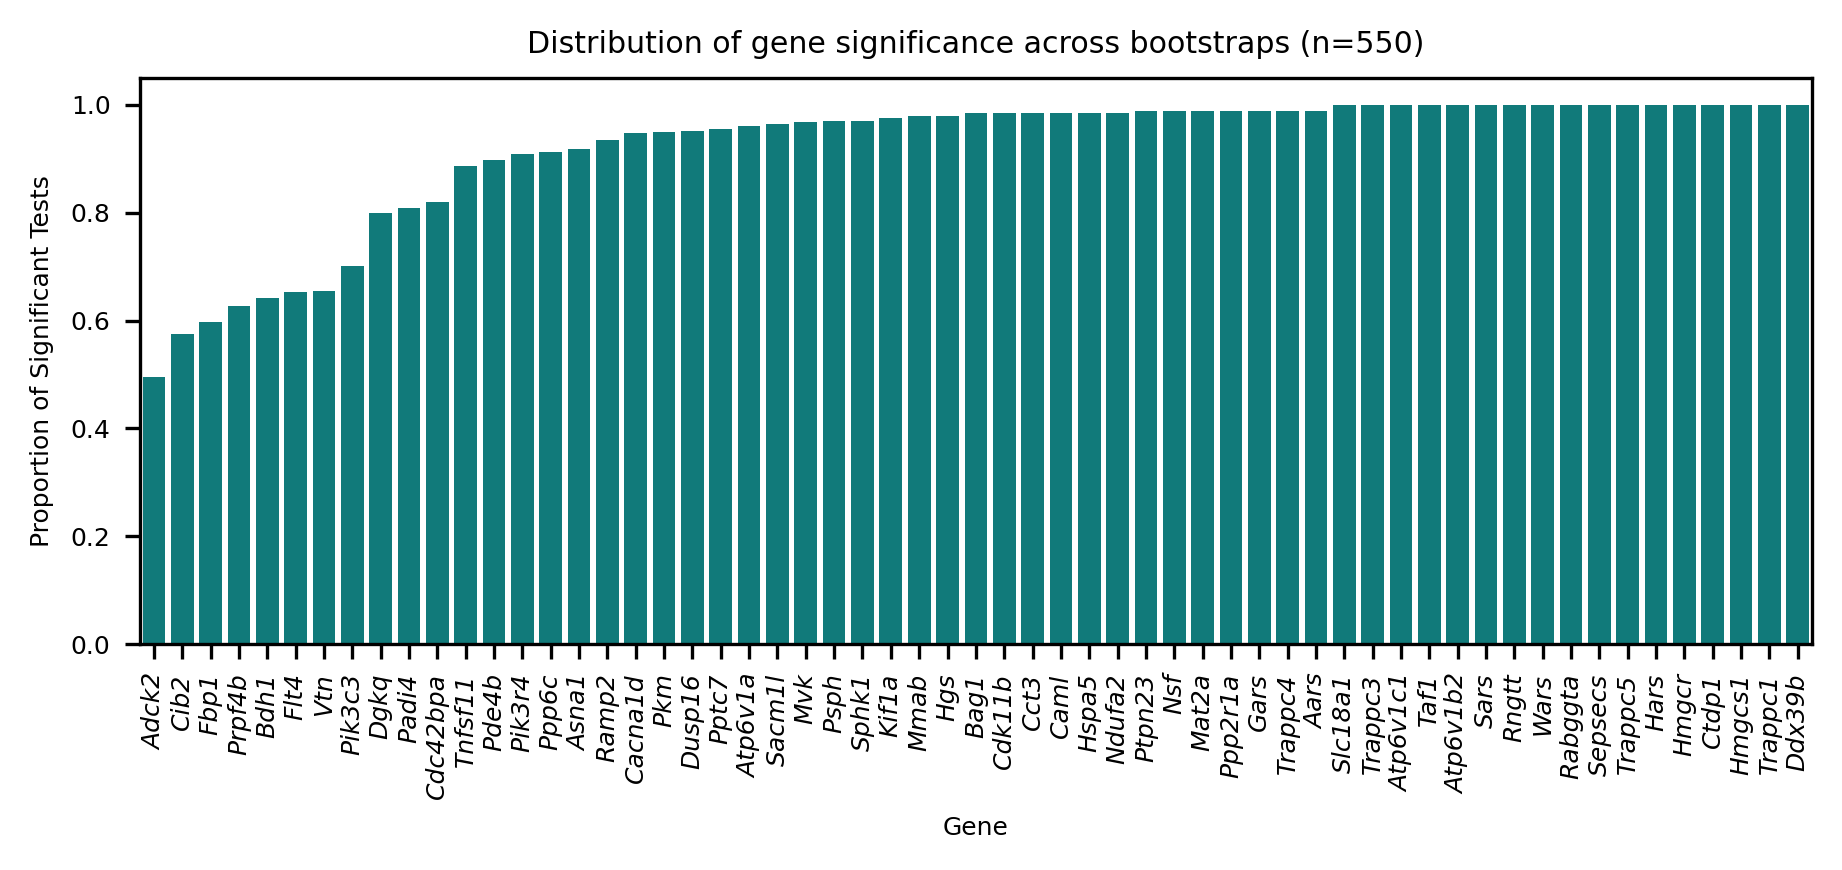

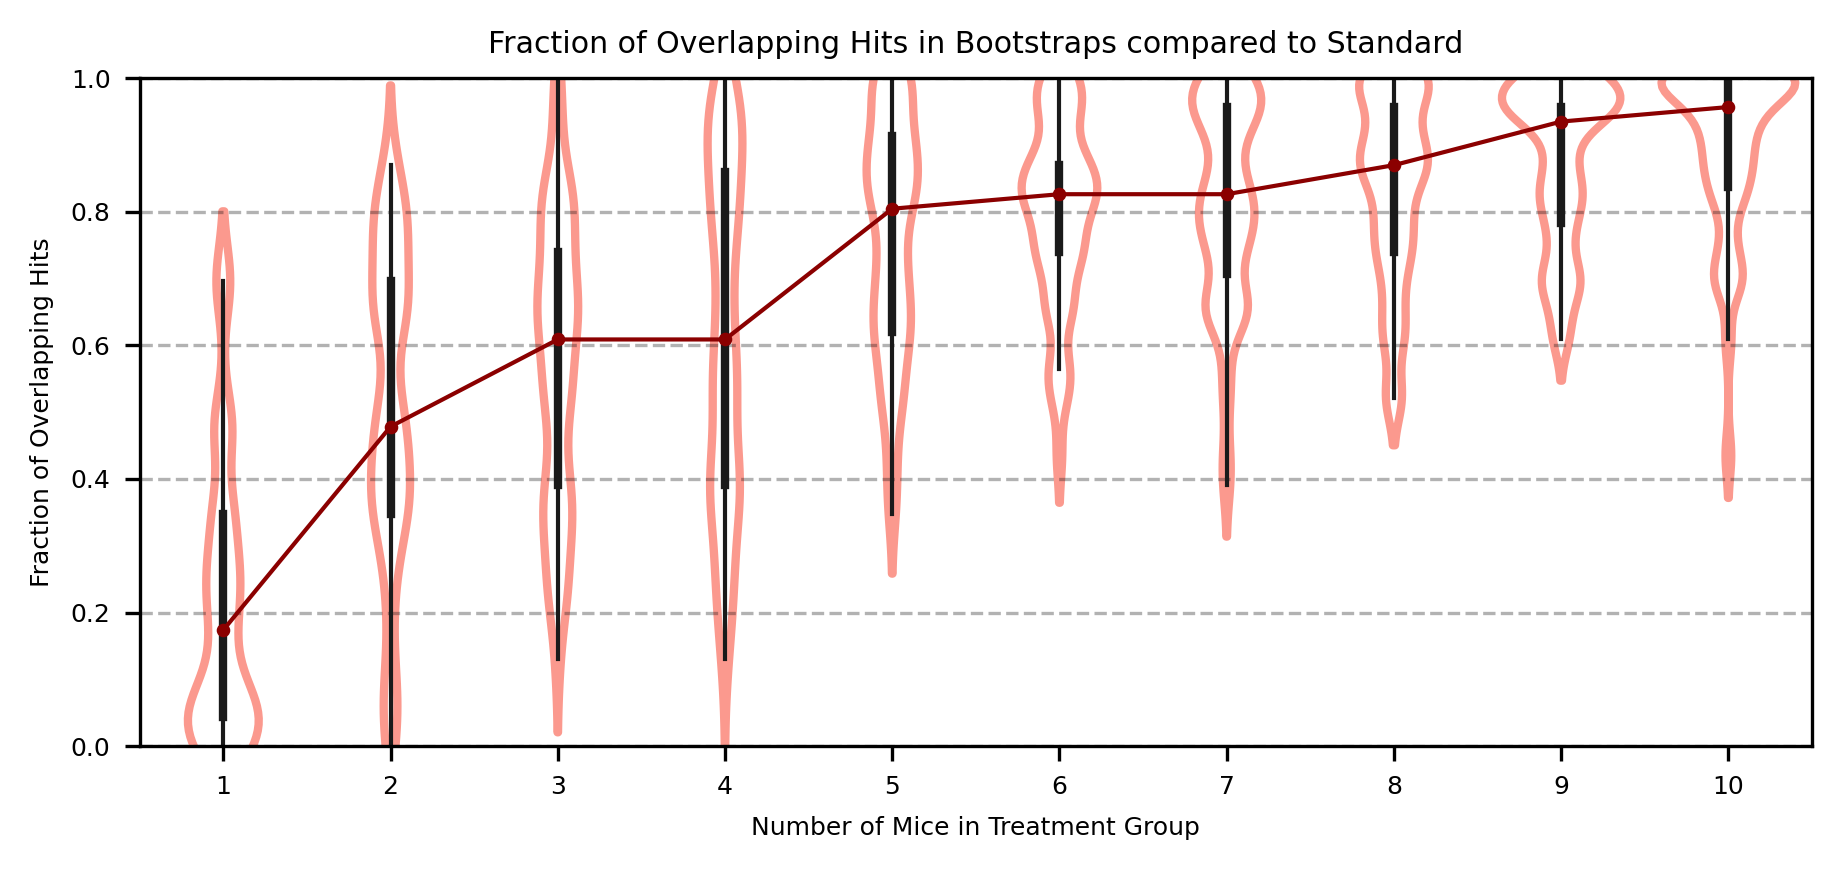

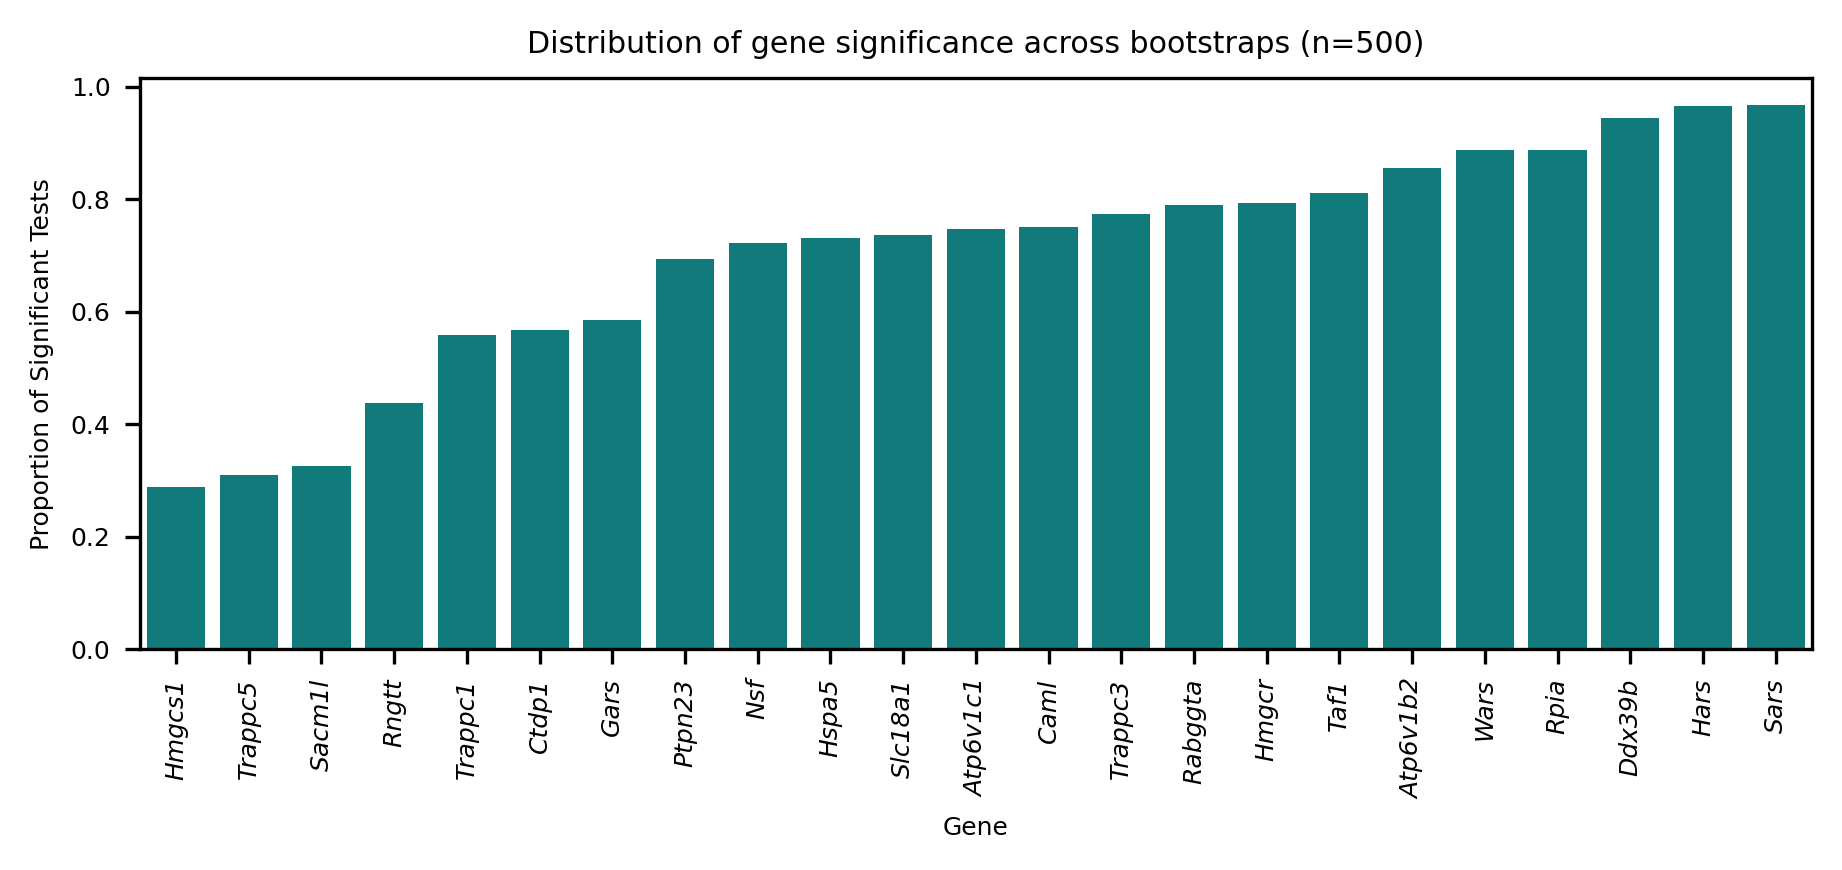

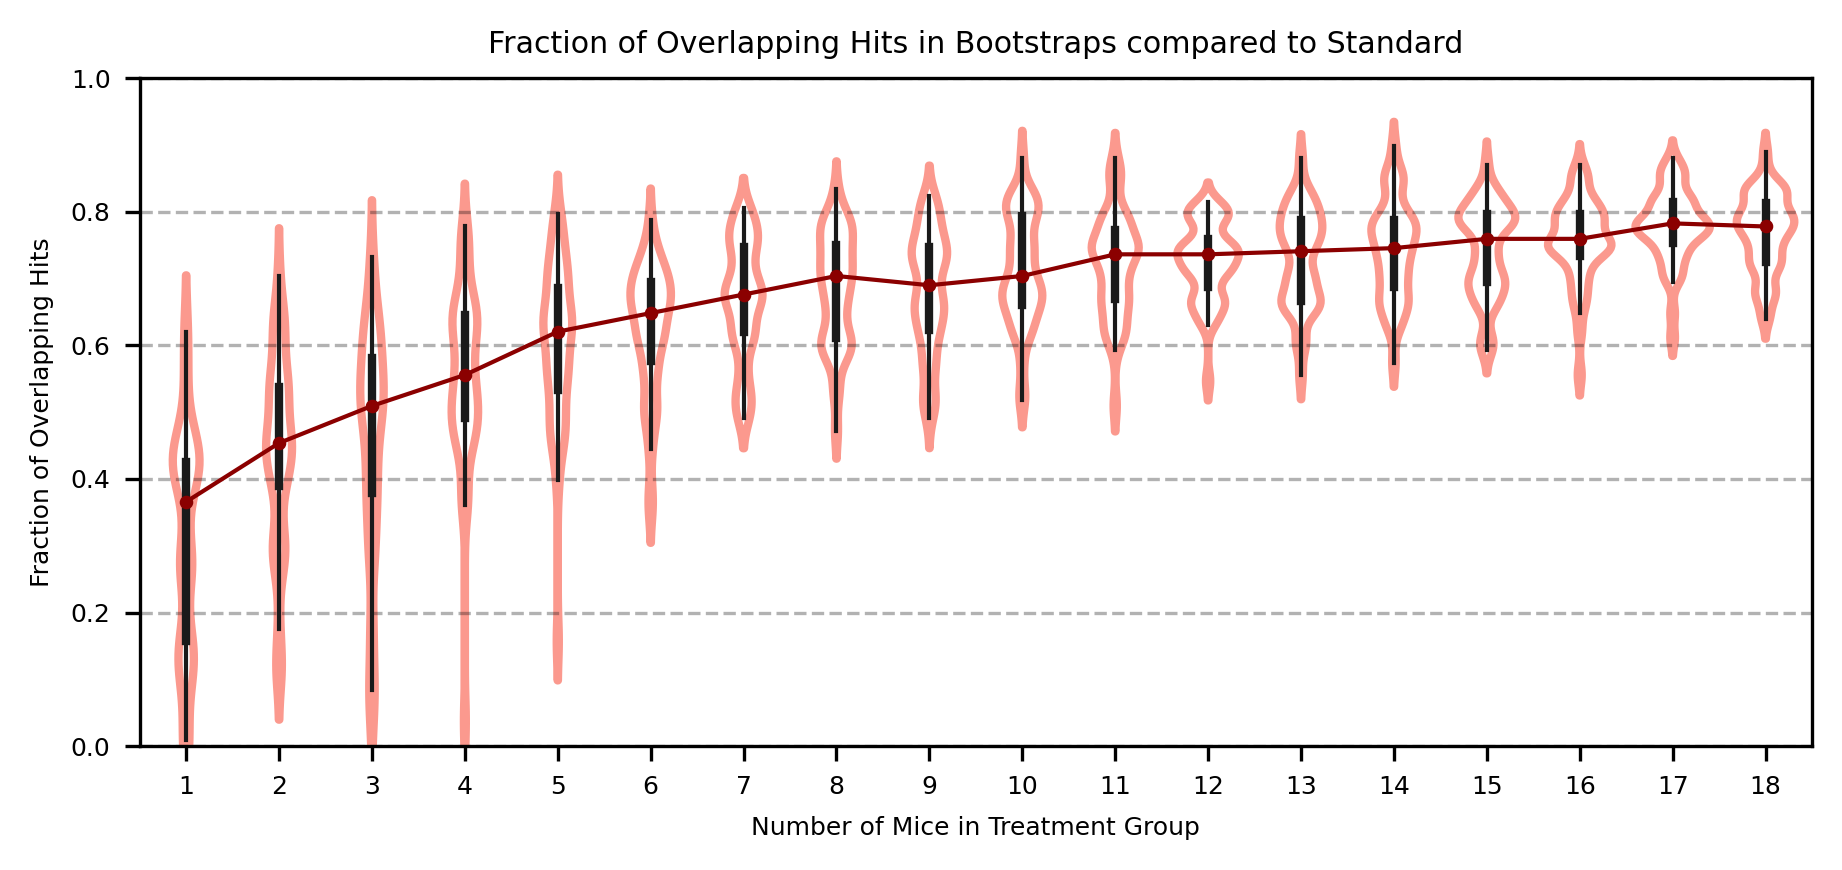

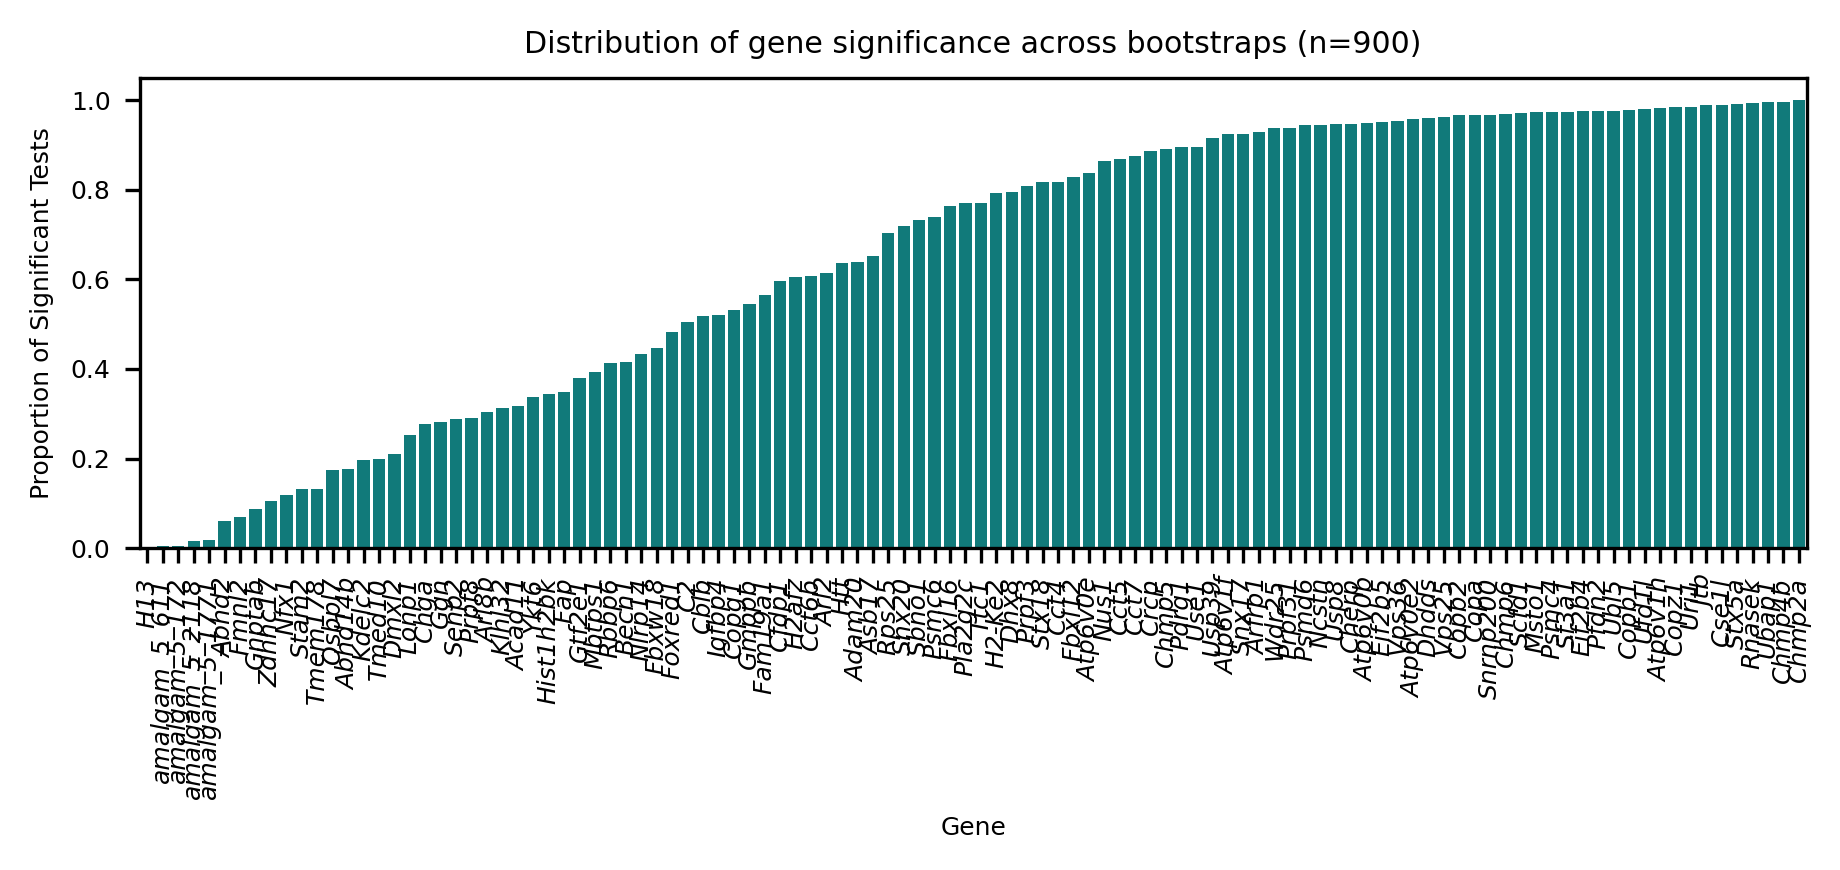

In [7]:
from rescreener import Violins, Recovery

proportion = (6.8, 3.2)
scalar = 0.9
height = proportion[0] * scalar
width = proportion[1] * scalar
dpi = 300

for bsa, name in zip(bsa_list, sample_names):
    Violins(
        bsa,
        height=height,
        width=width,
        dpi=dpi,
        sns_kwargs=dict(bw_method=0.25),
        inner_kwargs={
            "box_width": 2,
        },
    ).plot(save=os.path.join(fig_dir, f"{name}.violin.svg"))
    Recovery(bsa, height=height, width=width, dpi=dpi).plot(
        save=os.path.join(fig_dir, f"{name}.recovery.svg")
    )